# Lesson 2: Sorting, Filtering, and Aggregation

# Initial Setup

Import libraries and initialize variables to pick up where we left off in Lesson 1.

In [1]:
import pandas as pd

In [2]:
weather_all = pd.read_csv('data/weather_airports_24hr_snapshot.csv')

# Sorting

- It's often convenient to have data in a sorted form
- In Excel, we can sort our data based on the values in a column
  - We can do the same with `pandas` DataFrames
- We can also use sorting to answer questions about the extreme (highest / lowest) values in our data

For example, in the exercises from Lesson 1, we saw that the coldest temperature in `weather_all` was -7.1 C.
  - At what station and datetime did this coldest temperature occur?
  - What were the weather conditions associated with this coldest temperature?

We can answer these questions by using the `sort_values` method to sort the DataFrame based on the values in the temperature column:

In [3]:
weather_sorted = weather_all.sort_values('Temp (deg C)')
weather_sorted.head()

,Datetime (Local Standard),Station ID,Station Name,Timezone,Datetime (UTC),Temp (deg C),Dew Point Temp (deg C),Rel Hum (%),Wind Dir (deg),Wind Spd (km/h),Visibility (km),Pressure (kPa),Hmdx,Wind Chill,Conditions
130,2018-05-22 05:00:00,YFB,IQALUIT,EST,2018-05-22 10:00:00,-7.1,-10.5,77.0,310.0,22.0,24.1,100.60,NaN,-15.0,Snow
129,2018-05-22 04:00:00,YFB,IQALUIT,EST,2018-05-22 09:00:00,-7.0,-10.4,76.0,330.0,23.0,24.1,100.62,NaN,-15.0,Snow
131,2018-05-22 06:00:00,YFB,IQALUIT,EST,2018-05-22 11:00:00,-6.9,-11.0,73.0,340.0,26.0,9.7,100.59,NaN,-15.0,"Snow,Blowing Snow"
127,2018-05-22 02:00:00,YFB,IQALUIT,EST,2018-05-22 07:00:00,-6.6,-9.1,83.0,330.0,16.0,16.1,100.64,NaN,-13.0,Snow
128,2018-05-22 03:00:00,YFB,IQALUIT,EST,2018-05-22 08:00:00,-6.6,-9.8,78.0,330.0,25.0,32.2,100.61,NaN,-14.0,Snow


- The coldest temperature was at Iqaluit at 5am local time, accompanied by snow
- Note: the above code does not modify our original DataFrame `weather_all`

- `sort_values` sorts in ascending order (lowest to highest) by default
- We can switch this using the `ascending` keyword argument:

In [4]:
weather_all.sort_values('Temp (deg C)', ascending=False).head()

,Datetime (Local Standard),Station ID,Station Name,Timezone,Datetime (UTC),Temp (deg C),Dew Point Temp (deg C),Rel Hum (%),Wind Dir (deg),Wind Spd (km/h),Visibility (km),Pressure (kPa),Hmdx,Wind Chill,Conditions
264,2018-05-21 18:00:00,YXE,SASKATOON,CST,2018-05-22 00:00:00,28.6,4.9,22.0,310.0,26.0,24.1,94.79,28.0,NaN,Mostly Cloudy
260,2018-05-22 14:00:00,YQR,REGINA,CST,2018-05-22 20:00:00,28.6,5.6,23.0,320.0,21.0,24.1,94.42,28.0,NaN,Mainly Clear
263,2018-05-22 17:00:00,YQR,REGINA,CST,2018-05-22 23:00:00,28.5,5.5,23.0,110.0,20.0,24.1,94.42,28.0,NaN,Mostly Cloudy
265,2018-05-21 19:00:00,YXE,SASKATOON,CST,2018-05-22 01:00:00,28.5,4.7,22.0,310.0,19.0,24.1,94.80,28.0,NaN,Mostly Cloudy
453,2018-05-22 15:00:00,YWG,WINNIPEG,CST,2018-05-22 21:00:00,28.5,7.4,26.0,160.0,21.0,24.1,98.49,29.0,NaN,Mostly Cloudy


# Filtering

We can extract rows from a DataFrame or Series based on a criteria
- Similar to applying a filter in Excel

With filtering (plus the other techniques we've learned so far), we can answer questions like:
- How many stations had temperature(s) above 25 C?
- Which station had the most hours with temperatures above 25 C?

First we use the comparison operator `>` on the temperature column:

In [5]:
warm = weather_all['Temp (deg C)'] > 25
warm

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22      True
23      True
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
450     True
451     True
452     True
453     True
454     True
455     True
456    False
457    False
458    False
459    False
460    False
461    False
462    False
463    False
464    False
465    False
466    False
467    False
468    False
469    False
470    False
471    False
472    False
473    False
474    False
475    False
476    False
477    False
478    False
479    False
Name: Temp (deg C), Length: 480, dtype: bool

- `warm` is a Boolean Series of length equal to the number of rows of `weather_all`
- The index of `warm` is equal to the index of `weather_all`
- We can use `value_counts` to find out how many rows with temperatures > 25 C are in our data:

In [6]:
warm.value_counts()

False    442
True      38
Name: Temp (deg C), dtype: int64

Alternatively, we can find the number of rows by using the `sum` method:
- When you sum a Boolean series, `True` is treated as 1 and `False` as 0

In [7]:
warm.sum()

38

Temperatures are greater than 25 C in 38 rows of our data, but this doesn't tell us the number of stations, since a station might have multiple rows (multiple hours) with temperature > 25 C.

We can use the Boolean Series `warm` as a **filter** to extract the rows of `weather_all` which have temperature > 25 C
- Previously we used square brackets and a column name to extract a *column* from a DataFrame (e.g. `series_X = df['X']`)
- Now we use square brackets and a Boolean Series to extract *rows* from a DataFrame

In [8]:
weather_warm = weather_all[warm]
weather_warm.head()

,Datetime (Local Standard),Station ID,Station Name,Timezone,Datetime (UTC),Temp (deg C),Dew Point Temp (deg C),Rel Hum (%),Wind Dir (deg),Wind Spd (km/h),Visibility (km),Pressure (kPa),Hmdx,Wind Chill,Conditions
22,2018-05-22 15:00:00,YYC,CALGARY,MST,2018-05-22 22:00:00,25.5,4.4,25.0,140.0,16.0,48.3,88.96,25.0,NaN,Mainly Clear
23,2018-05-22 16:00:00,YYC,CALGARY,MST,2018-05-22 23:00:00,25.4,2.8,23.0,120.0,21.0,48.3,88.93,NaN,NaN,Mainly Clear
69,2018-05-22 14:00:00,YEG,EDMONTON,MST,2018-05-22 21:00:00,27.0,4.3,23.0,100.0,16.0,24.1,92.99,26.0,NaN,Mainly Clear
70,2018-05-22 15:00:00,YEG,EDMONTON,MST,2018-05-22 22:00:00,26.7,3.5,22.0,100.0,4.0,24.1,92.97,26.0,NaN,Mainly Clear
71,2018-05-22 16:00:00,YEG,EDMONTON,MST,2018-05-22 23:00:00,27.3,3.6,21.0,100.0,11.0,24.1,92.94,26.0,NaN,Mainly Clear


In [9]:
weather_warm.shape

(38, 15)

`weather_warm` is a DataFrame containing only the 38 rows of `weather_all` that have temperature > 25 C.

The number of unique stations with temperature > 25 C is:

In [10]:
weather_warm['Station Name'].nunique()

8

These stations and the number of hours at each station with temperature > 25 C are:

In [11]:
weather_warm['Station Name'].value_counts()

REGINA           8
WINNIPEG         8
THUNDER BAY      7
SASKATOON        6
EDMONTON         3
CALGARY          2
QUEBEC           2
PRINCE GEORGE    2
Name: Station Name, dtype: int64

So to answer our original questions:
- There are 8 stations with one or more hourly temperatures exceeding 25 C
- Winnipeg and Regina are tied for first place for temperatures exceeding 25 C, with 8 hours each

- We can use any of the comparison operators (`>`, `>=`, `<`, `<=`, `==`, `!=`) on a DataFrame column to create Boolean Series for filtering our data
- We can also apply comparison operators and other functions to an entire DataFrame to create a DataFrame of Boolean values corresponding to some criteria
  - This can be useful for counting how often something occurs in each row or column of data, such as missing values

---

# Interlude: Missing Data

With any data that we're working with, it's good to know:
  - How many values are missing?
  - Where are the empty cells located in our DataFrame (or Series)?

The `isnull` method returns `True` when data is missing (`NaN`) and `False` otherwise
- We can use this method to locate and count missing values

In [12]:
weather_missing = weather_all.isnull()
weather_missing.head()

,Datetime (Local Standard),Station ID,Station Name,Timezone,Datetime (UTC),Temp (deg C),Dew Point Temp (deg C),Rel Hum (%),Wind Dir (deg),Wind Spd (km/h),Visibility (km),Pressure (kPa),Hmdx,Wind Chill,Conditions
0,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False


- `weather_missing` is a Boolean DataFrame
- The `sum` method will sum the Boolean values along each column and give us the missing counts:

In [13]:
weather_missing.sum()

Datetime (Local Standard)      0
Station ID                     0
Station Name                   0
Timezone                       0
Datetime (UTC)                 0
Temp (deg C)                   1
Dew Point Temp (deg C)         1
Rel Hum (%)                    1
Wind Dir (deg)                17
Wind Spd (km/h)                1
Visibility (km)                1
Pressure (kPa)                 1
Hmdx                         439
Wind Chill                   455
Conditions                     1
dtype: int64

- With `pandas` tools, it is very easy to assess the completeness of your data and drill down to find exactly where any missing values are occurring
- Other useful methods for handling missing data include `dropna`, `fillna`, and `interpolate`

---

# Exercise 2.1

a) Create a new DataFrame which contains only the rows of `weather_all` where the station name is `'SASKATOON'`

b) Display the Saskatoon data sorted on the `'Wind Spd (km/h)'` column in descending order. What is the fastest wind speed and what are the corresponding datetime and temperature?

c) Compute the mean values for the Saskatoon data.

a) Create a new DataFrame which contains only the rows of `weather_all` where the station name is `'SASKATOON'`

b) Display the Saskatoon data sorted on the `'Wind Spd (km/h)'` column in descending order. What is the fastest wind speed and what are the corresponding datetime and temperature?

c) Compute the mean values for the Saskatoon data.

# Aggregation

- In the previous exercise, we used a filter to extract data for Saskatoon and compute the mean values for this station
- We could repeat this procedure for each station in our data, but it would be slow and tedious
- Luckily, with `pandas` there is a better way: using aggregation to compute statistics for groups within our data
  - Similar to pivot tables in Excel or `GROUPBY` queries in SQL

With aggregation, we can answer questions such as:
  - What are the mean, minimum, and maximum temperatures *at each station* in `weather_all`?

For simple aggregations, we can use the `groupby` method chained with a summary statistic (e.g., `mean`, `median`, `max`, `min`, `std`, `count`, `sum`)
- For example, find the mean values for each station:

In [14]:
weather_mean = weather_all.groupby('Station Name').mean()
weather_mean

,Temp (deg C),Dew Point Temp (deg C),Rel Hum (%),Wind Dir (deg),Wind Spd (km/h),Visibility (km),Pressure (kPa),Hmdx,Wind Chill
Station Name,,,,,,,,,
CALGARY,18.054167,4.708333,43.875000,172.083333,10.625000,45.937500,88.990833,25.000000,NaN
CHARLOTTETOWN,8.637500,0.058333,59.666667,212.916667,12.500000,24.100000,101.363750,NaN,-3.000
EDMONTON,17.558333,5.037500,48.791667,208.333333,8.083333,24.100000,92.950833,26.000000,NaN
FREDERICTON,12.373913,0.086957,48.608696,247.222222,14.043478,16.100000,101.679565,NaN,NaN
HALIFAX,12.237500,-1.416667,40.041667,178.333333,15.500000,24.100000,100.328333,NaN,NaN
IQALUIT,-5.350000,-8.695833,77.625000,329.583333,29.625000,23.670833,100.540417,NaN,-13.125
MONTREAL,17.479167,8.550000,56.958333,195.000000,11.791667,29.141667,101.318750,NaN,NaN
OTTAWA,15.537500,9.516667,68.541667,194.583333,8.500000,23.766667,100.387500,NaN,NaN
PRINCE GEORGE,14.337500,5.883333,62.291667,141.538462,5.791667,15.900000,93.307083,25.000000,NaN


Note that this DataFrame has station names (i.e. text labels) as its index instead of integer row numbers

How about the maximum values for each station? Let's display the aggregated data sorted from highest to lowest wind speed:
- *Note: The example below uses the `numeric_only=True` keyword argument because `pandas` default is to calculate a "maximum" of text data, which is not meaningful here*

In [15]:
weather_max = weather_all.groupby('Station Name').max(numeric_only=True)
weather_max.sort_values('Wind Spd (km/h)', ascending=False)

,Temp (deg C),Dew Point Temp (deg C),Rel Hum (%),Wind Dir (deg),Wind Spd (km/h),Visibility (km),Pressure (kPa),Hmdx,Wind Chill
Station Name,,,,,,,,,
IQALUIT,-2.8,-6.1,84.0,340.0,54.0,48.3,100.73,NaN,-11.0
WHITEHORSE,13.8,3.8,88.0,200.0,39.0,64.4,92.35,NaN,NaN
QUEBEC,25.6,9.8,76.0,360.0,39.0,48.3,101.11,26.0,NaN
FREDERICTON,21.8,2.7,96.0,350.0,35.0,16.1,102.00,NaN,NaN
ST. JOHN'S,7.8,2.7,92.0,350.0,33.0,24.1,100.18,NaN,NaN
CHARLOTTETOWN,17.7,3.7,96.0,360.0,32.0,24.1,101.73,NaN,-3.0
YELLOWKNIFE,23.1,6.2,70.0,200.0,31.0,24.1,98.38,NaN,NaN
HALIFAX,17.4,6.2,64.0,360.0,31.0,24.1,100.60,NaN,NaN
THUNDER BAY,28.2,6.1,93.0,350.0,28.0,32.2,99.26,27.0,NaN


---

# Interlude: Fancier Aggregation

We can use the `agg` method to compute multiple aggregated statistics on our data:

In [16]:
weather_all.groupby('Station Name').agg(['mean', 'std'])

Temp (deg C)            Dew Point Temp (deg C)            \
                      mean        std                   mean       std   
Station Name                                                             
CALGARY          18.054167   5.194979               4.708333  0.971291   
CHARLOTTETOWN     8.637500   6.042373               0.058333  1.727506   
EDMONTON         17.558333   7.724434               5.037500  1.459545   
FREDERICTON      12.373913   7.327856               0.086957  2.187839   
HALIFAX          12.237500   3.411338              -1.416667  3.164706   
IQALUIT          -5.350000   1.394399              -8.695833  1.646730   
MONTREAL         17.479167   2.839776               8.550000  2.950755   
OTTAWA           15.537500   2.425734               9.516667  2.363981   
PRINCE GEORGE    14.337500   7.250176               5.883333  1.717345   
QUEBEC           15.366667   6.864950               3.875000  4.033690   
REGINA           21.337500   5.807103               6.279167  1.204693   
SASKATOON        19.308333   5.844873               6.845833  2.110219   
ST. JOHN'S        4.862500   1.230345               0.850000  1.458409   
THUNDER BAY      14.625000  10.271203               2.045833  1.610557   
TORONTO          14.833333   2.610958               9.045833  4.597918   
VANCOUVER        15.262500   2.842199              11.016667  1.202775   
VICTORIA         15.658333   4.202268              10.408333  1.030794   
WHITEHORSE        9.183333   3.133225               0.533333  1.946159   
WINNIPEG         20.495833   5.947047               5.929167  5.400280   
YELLOWKNIFE      15.400000   4.589497               3.008333  1.848364   

              Rel Hum (%)            Wind Dir (deg)              \
                     mean        std           mean         std   
Station Name                                                      
CALGARY         43.875000  15.671388     172.083333  102.447406   
CHARLOTTETOWN   59.666667  23.466288     212.916667   89.757120   
EDMONTON        48.791667  22.675363     208.333333  110.125094   
FREDERICTON     48.608696  24.882888     247.222222   64.789756   
HALIFAX         40.041667  10.868699     178.333333   94.024357   
IQALUIT         77.625000   4.147419     329.583333    6.902531   
MONTREAL        56.958333  13.505165     195.000000   65.208695   
OTTAWA          68.541667  13.765044     194.583333   82.196962   
PRINCE GEORGE   62.291667  24.333693     141.538462   83.050803   
QUEBEC          47.666667  12.288795     236.666667  112.584912   
REGINA          39.958333  15.121189     221.666667  114.802919   
SASKATOON       48.708333  20.756307     185.833333  134.193782   
ST. JOHN'S      75.916667  10.442042     195.000000  102.914063   
THUNDER BAY     51.958333  28.881285     212.500000   94.604440   
TORONTO         72.458333  23.843656     118.333333   95.583638   
VANCOUVER       76.500000  10.966352     234.583333  101.979502   
VICTORIA        72.625000  16.021216     192.500000   95.973275   
WHITEHORSE      57.125000  17.121846     162.916667   18.528278   
WINNIPEG        43.208333  21.198809     187.916667   13.824731   
YELLOWKNIFE     45.041667  13.016642     158.750000   24.013130   

              Wind Spd (km/h)            Visibility (km)             \
                         mean        std            mean        std   
Station Name                                                          
CALGARY             10.625000   5.131425       45.937500  15.852577   
CHARLOTTETOWN       12.500000   9.623341       24.100000   0.000000   
EDMONTON             8.083333   4.577038       24.100000   0.000000   
FREDERICTON         14.043478  11.343714       16.100000   0.000000   
HALIFAX             15.500000   9.108047       24.100000   0.000000   
IQALUIT             29.625000  11.988446       23.670833  12.404609   
MONTREAL            11.791667   5.785884       29.141667  10.039397   
OTTAWA               8.500000   3.489114       23.766667   

We can also use `agg` to compute different statistics for different columns:

In [17]:
agg_dict = {'Temp (deg C)' : ['min', 'median', 'max'],
            'Rel Hum (%)' : ['mean', 'std']}
weather_all.groupby('Station Name').agg(agg_dict)

Temp (deg C)              Rel Hum (%)           
                       min median   max        mean        std
Station Name                                                  
CALGARY               10.1  18.50  25.5   43.875000  15.671388
CHARLOTTETOWN         -1.4   8.25  17.7   59.666667  23.466288
EDMONTON               5.2  19.85  27.3   48.791667  22.675363
FREDERICTON            0.7  13.50  21.8   48.608696  24.882888
HALIFAX                6.9  13.00  17.4   40.041667  10.868699
IQALUIT               -7.1  -6.00  -2.8   77.625000   4.147419
MONTREAL              12.9  16.90  22.4   56.958333  13.505165
OTTAWA                12.3  15.10  22.1   68.541667  13.765044
PRINCE GEORGE          4.2  14.30  25.9   62.291667  24.333693
QUEBEC                 6.5  15.10  25.6   47.666667  12.288795
REGINA                 9.8  22.30  28.6   39.958333  15.121189
SASKATOON             12.1  17.70  28.6   48.708333  20.756307
ST. JOHN'S             3.0   4.85   7.8   75.916667  10.442042
THUNDER BAY            0.9  13.50  28.2   51.958333  28.881285
TORONTO               11.4  13.95  20.1   72.458333  23.843656
VANCOUVER             10.4  15.30  19.5   76.500000  10.966352
VICTORIA              10.0  16.20  22.6   72.625000  16.021216
WHITEHORSE             4.8   9.80  13.8   57.125000  17.121846
WINNIPEG              12.0  20.75  28.5   43.208333  21.198809
YELLOWKNIFE            7.0  15.55  23.1   45.041667  13.016642

For even more complex aggregations, there is also a `pivot_table` method.

---

Returning to our `weather_mean` data:

In [18]:
weather_mean

,Temp (deg C),Dew Point Temp (deg C),Rel Hum (%),Wind Dir (deg),Wind Spd (km/h),Visibility (km),Pressure (kPa),Hmdx,Wind Chill
Station Name,,,,,,,,,
CALGARY,18.054167,4.708333,43.875000,172.083333,10.625000,45.937500,88.990833,25.000000,NaN
CHARLOTTETOWN,8.637500,0.058333,59.666667,212.916667,12.500000,24.100000,101.363750,NaN,-3.000
EDMONTON,17.558333,5.037500,48.791667,208.333333,8.083333,24.100000,92.950833,26.000000,NaN
FREDERICTON,12.373913,0.086957,48.608696,247.222222,14.043478,16.100000,101.679565,NaN,NaN
HALIFAX,12.237500,-1.416667,40.041667,178.333333,15.500000,24.100000,100.328333,NaN,NaN
IQALUIT,-5.350000,-8.695833,77.625000,329.583333,29.625000,23.670833,100.540417,NaN,-13.125
MONTREAL,17.479167,8.550000,56.958333,195.000000,11.791667,29.141667,101.318750,NaN,NaN
OTTAWA,15.537500,9.516667,68.541667,194.583333,8.500000,23.766667,100.387500,NaN,NaN
PRINCE GEORGE,14.337500,5.883333,62.291667,141.538462,5.791667,15.900000,93.307083,25.000000,NaN


Let's look at the temperature column:

In [19]:
temp_mean = weather_mean['Temp (deg C)']
temp_mean

Station Name
CALGARY          18.054167
CHARLOTTETOWN     8.637500
EDMONTON         17.558333
FREDERICTON      12.373913
HALIFAX          12.237500
IQALUIT          -5.350000
MONTREAL         17.479167
OTTAWA           15.537500
PRINCE GEORGE    14.337500
QUEBEC           15.366667
REGINA           21.337500
SASKATOON        19.308333
ST. JOHN'S        4.862500
THUNDER BAY      14.625000
TORONTO          14.833333
VANCOUVER        15.262500
VICTORIA         15.658333
WHITEHORSE        9.183333
WINNIPEG         20.495833
YELLOWKNIFE      15.400000
Name: Temp (deg C), dtype: float64

What type of object is this?

In [20]:
type(temp_mean)

pandas.core.series.Series

It is a Series, with the station names as its index.  We've a seen similar type of Series earlier with the output of the `value_counts` method.

Looking at the `temp_mean` Series, we could pick out the warmest and coldest stations by eye, but it's much easier to see the rankings if we use the `sort_values` method
- To sort a DataFrame, we have to specify which column we're sorting on, as an argument to `sort_values`
- Since a Series is a single column of data, this argument is not needed

In [21]:
temp_mean.sort_values()

Station Name
IQALUIT          -5.350000
ST. JOHN'S        4.862500
CHARLOTTETOWN     8.637500
WHITEHORSE        9.183333
HALIFAX          12.237500
FREDERICTON      12.373913
PRINCE GEORGE    14.337500
THUNDER BAY      14.625000
TORONTO          14.833333
VANCOUVER        15.262500
QUEBEC           15.366667
YELLOWKNIFE      15.400000
OTTAWA           15.537500
VICTORIA         15.658333
MONTREAL         17.479167
EDMONTON         17.558333
CALGARY          18.054167
SASKATOON        19.308333
WINNIPEG         20.495833
REGINA           21.337500
Name: Temp (deg C), dtype: float64

Next, let's make a bar chart of the station mean temperatures.

# Plots

- `pandas` DataFrames and Series provide methods to quickly and easily plot your data
- These methods use the `matplotlib` library behind the scenes

First we need to use the magic command `%matplotlib inline` so that our plots will display inline in our Jupyter notebook
- This command only needs to be run once, and it's good practice to put it at the start of your notebook with the `import` commands

In [22]:
%matplotlib inline

We can create a bar chart of the `temp_mean` Series with the `plot` method
- `plot` is a convenience method which allows us to quickly generate plots with useful defaults
- We use the keyword argument `kind='bar'` to specify the chart type:

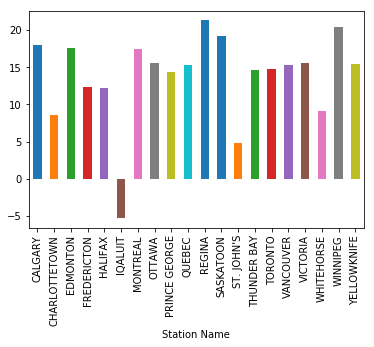

In [23]:
temp_mean.plot(kind='bar')

- The x-axis is the Series index, which is the list of station names
- The `plot` method returns a `matplotlib.Axes` object which is displayed as cell output
  - To suppress displaying this output, add a semi-colon to the end of the command
- It would be nice if the plot and font sizes were bigger and the bars were all the same colour

If you display the documentation with `temp_mean.plot?` in your Jupyter notebook, you can see various keyword arguments available
- Let's customize our plot with the `figsize`, `fontsize`, `colormap`, and `title` keyword arguments:

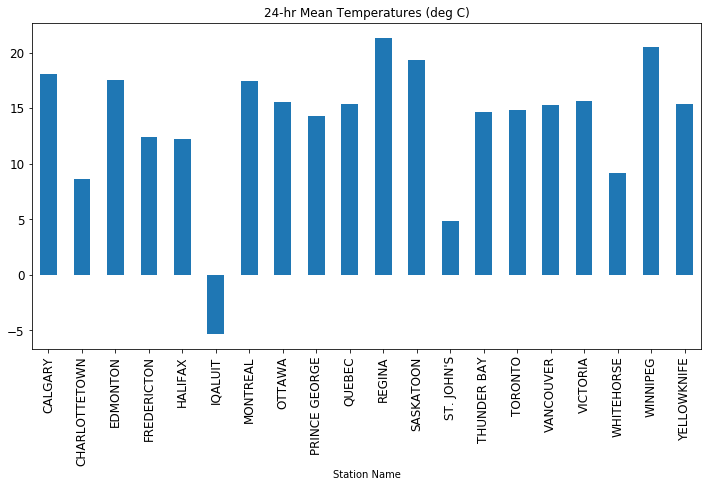

In [24]:
temp_mean.plot(kind='bar', figsize=(12, 6), fontsize='large', 
               colormap='tab10', 
               title='24-hr Mean Temperatures (deg C)');

- The`'tab10'` colormap is a set of 10 default colours based on the palette from the data visualization software Tableau
- For more on colours in `pandas` and `matplotlib`:
  - https://matplotlib.org/users/colors.html
  - https://matplotlib.org/users/colormaps.html

There are many more ways we could customize our plots (labels, axes limits and ticks, etc.) and many other types of plots that can be created with `pandas` and `matplotlib`. For more details and examples:
- https://pandas.pydata.org/pandas-docs/stable/visualization.html
- https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py
- https://matplotlib.org/tutorials/introductory/sample_plots.html

# Lesson 2 Recap

### Sorting

Sorting a Series:
```
series_a.sort_values()
```

Sorting a DataFrame based on the values in the column `'Column B'`:
```
df.sort_values('Column B')
```
To sort in descending order, use the keyword argument `ascending=False`

### Filtering

To select a subset of rows with a filter:
  - Create a filter (Boolean Series) using a comparison operator or other functions (such as the `isnull` method)
  - Use the filter to extract the desired rows from the DataFrame

Example: comparison operator
```
warm = weather_all['Temp (deg C)'] > 25
weather_warm = weather_all[warm]
```

You can also use Boolean Series and DataFrames to count occurrences of specified criteria, for example: count the missing values in each column of a DataFrame with `df.isnull().sum()`


### Aggregation

For basic aggregation operations, use the `groupby` method chained with an aggregation method (e.g., `mean`, `sum`, `max`, `min`, `median`, `std`, `count`).

For example, to find the mean values for data grouped by `'Column B'`: `
```
df.groupby('Column B').mean()
```

For more complex aggregations, you can use the `agg` method.
- Specify a list of aggregation statistics, for example: 
```
weather_all.groupby('Station Name').agg(['mean', 'std'])
```
- Use a dictionary to specify different aggregation statistics for different columns, for example:

```
agg_dict = {'Temp (deg C)' : ['min', 'median', 'max'],
            'Rel Hum (%)' : ['mean', 'std']}
weather_all.groupby('Station Name').agg(agg_dict)
```

### Plots

To display `pandas` / `matplotlib` graphs inline in your Jupyter notebook, you need to run the following magic command:
```
%matplotlib inline
```
- This command only needs to be run once in a notebook
- It's good practice to run this command at the same time as your `import` commands, near the start of your notebook

Create quick and easy plots of Series and DataFrames with the `plot` method:
- For example, to create a bar chart of one column of a DataFrame:
  - `df['A'].plot(kind='bar')`
- Plots can be adjusted with keyword arguments such as `figsize`, `fontsize`, `title`, `colormap`

# Exercise 2.2

For this exercise, we'll be working with `'data/bc-popular-girls-names.csv'`:
- 100 years of baby girl names in British Columbia (1915-2014)
- The data includes every first name that was chosen five or more times in a given year
- Each row corresponds to one name and one year
  - `'Count'` column: total count for that name in that year
  - `'Fraction'` column: this name's share of the total of all baby girls for that year
  
a) Read the data file into a DataFrame and display summary statistics with the `describe` method.

- (i) What are the range of values (minimum and maximum) for the `'Year'`, `'Count'`, and `'Fraction'` columns? 
- (ii) The maximum value of `'Count'` represents the highest count of baby girls with the same name in a single year &mdash; what were this name and year?
- (iii) The maximum value of `'Fraction'` represents the highest _fraction_ (out of the total births for that year) of baby girls with the same name; what were this name and year? How do the count and fraction for this name and year compare with the values for the name/year from part (ii)?

b) Aggregate the data by grouping on the `'Year'` column and taking the `sum`. The `'Count'` column of the resulting DataFrame represents the total number of baby girls per year in this data&mdash;create a line plot of this column.

c) Compute the grand total for each name over the whole 100 years by grouping on `'Name'` and taking the `sum`. Extract the `'Count'` column from this DataFrame (it's the only column that is meaningful in this aggregation) and use this Series to find the top 10 most common girls names and plot their grand totals in a bar chart.


d) Create a filter to extract the data rows for the name `'MARY'`. To explore the popularity of this name over time, create a line plot of this name's share of the total in each year by plotting the `'Fraction'` column vs. the `'Year'` column, with the name `'MARY'` as title.
- Repeat the above steps for `'JENNIFER'` and any other name(s) of interest (if they're in the data)
- How do the trends over time for the name Mary compare with the name Jennifer?

_Hint: Check out the documentation for the `plot` method of a DataFrame. You'll see a `title` keyword argument, as well as a couple of extra keyword arguments (`x` and `y`) that aren't in `plot` method for a Series._

##### Bonus Exercises

e) Most popular names in recent years: Compute grand totals for each name, as in part (c), but only including the years from 2000 onwards. What are the top 10 most common girls names from 2000-present?

f) Trends in name diversity: Compute the number of unique names per year and plot this data as a line chart. How has name diversity evolved over time?

_Hint: The data is organized such that for each year, there is exactly one row for each unique name in that year, so grouping on `'Year'` and aggregating with `count` will give the unique count we're looking for._

g) Compute 100-year summary statistics grouped by name as in part (c), but with the following modifications:
- Use the `agg` function to calculate the following statistics for each name:
  - For the `'Year'` column: earliest year, latest year, number of years
  - For the `'Count'` column: grand total (sum), lowest yearly count, highest yearly count, mean yearly count
- Display a random sampling of 50 rows of the resulting DataFrame with the `sample` method.

h) Repeat any or all of parts (a)-(g) to explore the boys names data in `'data/bc-popular-boys-names.csv'`.

---

a) Read the data file into a DataFrame and display summary statistics with the `describe` method.

- (i) What are the range of values (minimum and maximum) for the `'Year'`, `'Count'`, and `'Fraction'` columns?

- (ii) The maximum value of `'Count'` represents the highest count of baby girls with the same name in a single year &mdash; what were this name and year?

- (iii) The maximum value of `'Fraction'` represents the highest _fraction_ (out of the total births for that year) of baby girls with the same name; what were this name and year? How do the count and fraction for this name and year compare with the values for the name/year from part (ii)?

b) Aggregate the data by grouping on the `'Year'` column and taking the `sum`. The `'Count'` column of the resulting DataFrame represents the total number of baby girls per year in this data&mdash;create a line plot of this column.

c) Compute the grand total for each name over the whole 100 years by grouping on `'Name'` and taking the `sum`. Extract the `'Count'` column from this DataFrame (it's the only column that is meaningful in this aggregation) and use this Series to find the top 10 most common girls names and plot their grand totals in a bar chart.

d) Create a filter to extract the data rows for the name `'MARY'`. To explore the popularity of this name over time, create a line plot of this name's share of the total in each year by plotting the `'Fraction'` column vs. the `'Year'` column, with the name `'MARY'` as title.

_Hint: Check out the documentation for the `plot` method of a DataFrame. You'll see a `title` keyword argument, as well as a couple of extra keyword arguments (`x` and `y`) that aren't in `plot` method for a Series._

- Repeat the above steps for `'JENNIFER'` and any other name(s) of interest (if they're in the data)
 - How do the trends over time for the name Mary compare with the name Jennifer?